<a href="https://colab.research.google.com/github/Umar-604/CS-351-AI-Lab-Github-Repository_2022604/blob/main/Umar_Tariq__CS_351L_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Lab 3 Task**

# Crossword Puzzle Solver

Crossword Puzzle Solver is a Python program that allows you to create and solve crossword puzzles. The program generates a grid with random blocked cells, takes a list of words from the user, and attempts to place them into the grid using a constraint propagation selection algorithm. It also visualizes word relationships using a graph.

# Task Description

**Implement a crossword puzzle solver that:**

- Accepts a random grid with blocked cells.
- Takes a list of words as input from the user.
- Places the words into horizontal and vertical slots in the grid, using constraint propagation for efficient word placement.
- Visualizes the relationships between words placed in the grid using a network graph.

# Game Features

- **Random Grid Generation:** A grid is randomly generated with a specified number of blocked cells.

- **Word Input:** The user provides a list of words to be placed in the crossword grid.

- **Slot Extraction:** The program automatically identifies valid horizontal and vertical word slots in the grid.

- **Constraint Propagation Selection Algorithm:** Words are placed efficiently in available slots, and intersections are maintained using a constraint propagation method.

- **Graph Visualization:** A graph visualization of the word relationships is created, showing intersections between words.



Generating random grid...
Generated Grid:
- - # - -
# - - # #
- - - # -
# - - # -
# # - # -
Enter the words to be placed in the grid (one per line). Enter an empty line to finish:
hello
hi
by
sky

Initial Grid:
Current Grid:
- - # - -
# - - # #
- - - # -
# - - # -
# # - # -
No solution found for word: hello
Placed word: hi
Current Grid:
h i # - -
# - - # #
- - - # -
# - - # -
# # - # -
Placed word: by
Current Grid:
h i # b y
# - - # #
- - - # -
# - - # -
# # - # -
Placed word: sky
Current Grid:
h i # b y
# s - # #
- k - # -
# y - # -
# # - # -
Final Grid:
Current Grid:
h i # b y
# s - # #
- k - # -
# y - # -
# # - # -


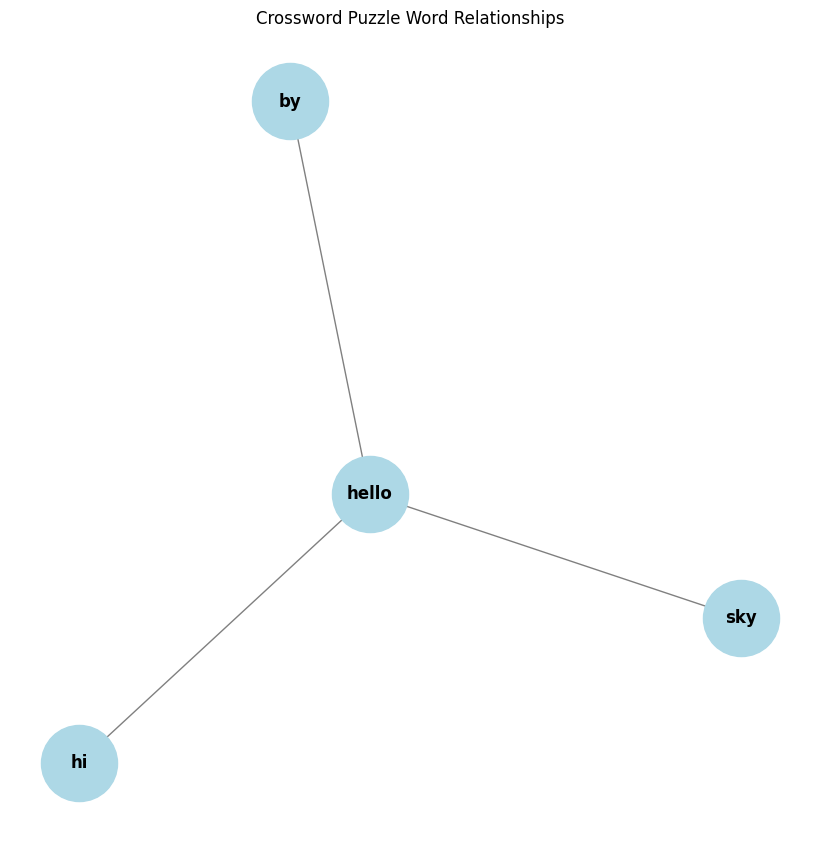

In [ ]:
import random
import matplotlib.pyplot as plt
import networkx as nx

class Crossword:
    def __init__(self, grid, word_list):
        self.grid = grid
        self.word_list = word_list
        self.word_slots = self.get_word_slots()
        self.G = nx.Graph()  # Create a graph object for word relationships

    def get_word_slots(self):
        """Extract all word slots (horizontal and vertical) from the grid."""
        slots = []
        # Example implementation of slot extraction
        rows, cols = len(self.grid), len(self.grid[0])
        for r in range(rows):
            for c in range(cols):
                # Horizontal slots
                if c + 1 < cols and self.grid[r][c] == '-':
                    length = 0
                    while c + length < cols and self.grid[r][c + length] == '-':
                        length += 1
                    if length > 1:
                        slots.append(('H', r, c, length))
                # Vertical slots
                if r + 1 < rows and self.grid[r][c] == '-':
                    length = 0
                    while r + length < rows and self.grid[r + length][c] == '-':
                        length += 1
                    if length > 1:
                        slots.append(('V', r, c, length))
        return slots

    def can_place_word(self, word, slot):
        """Check if a word can be placed in a slot."""
        direction, row, col, length = slot
        if len(word) != length:
            return False
        for i in range(length):
            r, c = (row, col + i) if direction == 'H' else (row + i, col)
            if self.grid[r][c] not in ('-', word[i]):
                return False
        return True

    def place_word(self, word, slot):
        """Place a word in a slot."""
        direction, row, col, length = slot
        for i in range(length):
            r, c = (row, col + i) if direction == 'H' else (row + i, col)
            self.grid[r][c] = word[i]
        self.add_to_graph(word, slot)

    def add_to_graph(self, word, slot):
        """Add word and its intersections to the graph."""
        direction, row, col, length = slot
        self.G.add_node(word)  # Add word to the graph
        # Check for intersections with other words
        for i in range(length):
            r, c = (row, col + i) if direction == 'H' else (row + i, col)
            intersect_word = self.find_word_at((r, c))
            if intersect_word and intersect_word != word:
                self.G.add_edge(word, intersect_word)  # Create an edge if words intersect

    def find_word_at(self, position):
        """Find the word at a given position."""
        for word in self.word_list:
            for slot in self.word_slots:
                direction, row, col, length = slot
                if direction == 'H' and row == position[0] and col <= position[1] < col + length:
                    return word
                if direction == 'V' and col == position[1] and row <= position[0] < row + length:
                    return word
        return None

    def visualize_word_graph(self):
        """Visualize the word relationship graph (without mathematical graphs)."""
        plt.figure(figsize=(8, 8))
        pos = nx.spring_layout(self.G)  # Spring layout for better clarity
        nx.draw(self.G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
        plt.title("Crossword Puzzle Word Relationships")
        plt.show()

    def solve(self):
        """Attempt to place each word into the grid."""
        for word in self.word_list[:]:  # Copy the list to modify it while iterating
            placed = False
            for slot in self.word_slots:
                if self.can_place_word(word, slot):
                    self.place_word(word, slot)
                    self.word_slots.remove(slot)  # Remove the slot once used
                    placed = True
                    break
            if not placed:
                print(f"No solution found for word: {word}")
            else:
                print(f"Placed word: {word}")
                self.print_grid()

    def print_grid(self):
        """Print the crossword grid."""
        print("Current Grid:")
        for row in self.grid:
            print(' '.join(row))

def generate_random_grid(rows, cols, num_blocks):
    """Generate a random grid with given dimensions and number of blocks."""
    grid = [['-' for _ in range(cols)] for _ in range(rows)]
    for _ in range(num_blocks):
        r = random.randint(0, rows - 1)
        c = random.randint(0, cols - 1)
        grid[r][c] = '#'
    return grid

def get_words_input():
    print("Enter the words to be placed in the grid (one per line). Enter an empty line to finish:")
    words = []
    while True:
        word = input().strip()
        if word == "":
            break
        words.append(word)
    return words

# Main program
if __name__ == "__main__":
    rows, cols = 5, 5  # Size of the grid
    num_blocks = 10    # Number of blocked cells

    print("Generating random grid...")
    grid = generate_random_grid(rows, cols, num_blocks)

    print("Generated Grid:")
    for row in grid:
        print(' '.join(row))

    words = get_words_input()

    crossword = Crossword(grid, words)

    print("Initial Grid:")
    crossword.print_grid()

    crossword.solve()

    print("Final Grid:")
    crossword.print_grid()

    # Visualize the word relationship graph
    crossword.visualize_word_graph()

